# MODULE 2: Deep Neural Nets as Models of Human Cognition

## Demo: Saliency Done Wrong!

This notebook is part of the [CHI'22 Online Course on Cognitive Modeling](https://sites.google.com/view/modeling-chi22/home).

*Authors: Antti Oulasvirta, Andrew Howes, Jussi Jokinen*

### Learning goal

In machine learning literature, saliency refers to features that a model's *hidden layers* have learned to exploit. This has **nothing** to do how humans look at images. Why? 

### Source

Based on [Yumi's tutorial on CNN and saliency](https://fairyonice.github.io/Saliency-Map-with-keras-vis.html).

In [ ]:
# Import tensorflow and keras
import tensorflow as tf
import tensorflow.keras as keras

# Import utilities
import matplotlib.pyplot as plt
import numpy as np

# Check versions
print('tensorflow {}'.format(tf.__version__))
print("keras {}".format(keras.__version__))

tensorflow 2.8.0
keras 2.8.0


In [ ]:
# We pick a pretrained model from Keras
# For full list, see: https://keras.io/api/applications/
# We pick VGG16, a simple but efficient CNN trained with Imagenet 

model = keras.applications.VGG16(weights='imagenet')

553476096/553467096 [==============================] - 4s 0us/step


How to build your own CNN in Keras? Here's a [tutorial](https://victorzhou.com/blog/keras-cnn-tutorial/) that shows how.

In [ ]:
# print model structure
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

--2022-04-24 14:21:28--  https://taitonetti.fi/image/catalog/blog/2021/win11-taskbar.jpg
Resolving taitonetti.fi (taitonetti.fi)... 104.26.9.105, 104.26.8.105, 172.67.75.102, ...
Connecting to taitonetti.fi (taitonetti.fi)|104.26.9.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92989 (91K) [image/jpeg]
Saving to: ‘windows11.jpg’

windows11.jpg       100%[===================>]  90.81K  --.-KB/s    in 0.008s  

2022-04-24 14:21:29 (10.7 MB/s) - ‘windows11.jpg’ saved [92989/92989]



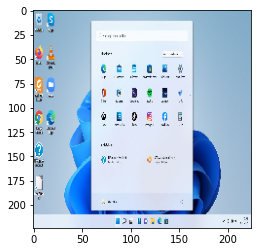

In [ ]:
# Download a UI for trying out
!wget -O windows11.jpg https://taitonetti.fi/image/catalog/blog/2021/win11-taskbar.jpg

# Preprocess the image for keras
_img = keras.preprocessing.image.load_img('/content/windows11.jpg',target_size=(224,224))

# Show the image
plt.imshow(_img)
plt.show()

In [ ]:
#preprocess image to get it into the right format for the model
img = keras.preprocessing.image.img_to_array(_img)
img = img.reshape((1, *img.shape))



In [ ]:
# Predict
y_pred = model.predict(img)

# Obtain saliency

layers = [layer.output for layer in model.layers]
images = tf.Variable(img, dtype=float)

with tf.GradientTape() as tape:
    pred = model(images, training=False)
    class_idxs_sorted = np.argsort(pred.numpy().flatten())[::-1]
    loss = pred[0][class_idxs_sorted[0]]
    
grads = tape.gradient(loss, images)
dgrad_abs = tf.math.abs(grads)
dgrad_max_ = np.max(dgrad_abs, axis=3)[0]

## Normalize to range between 0 and 1
arr_min, arr_max  = np.min(dgrad_max_), np.max(dgrad_max_)
grad_eval = (dgrad_max_ - arr_min) / (arr_max - arr_min + 1e-18)

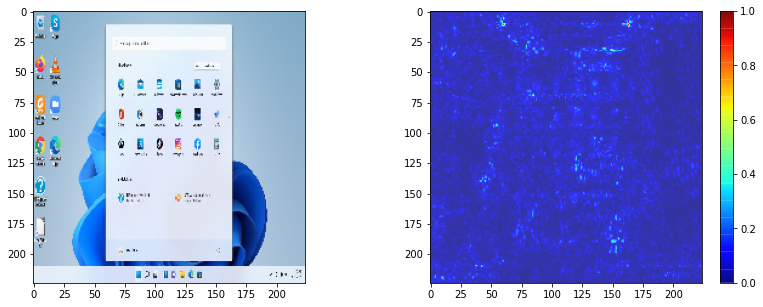

In [ ]:
# Visualize result

fig, axes = plt.subplots(1,2,figsize=(14,5))
axes[0].imshow(_img)
i = axes[1].imshow(grad_eval,cmap="jet",alpha=0.8)
fig.colorbar(i)

### Discussion

Why are the results not human-like?